# **2. Miles Per Gallon**

In [3]:
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import chisquare
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Analysez l'évolution de la consommation des voitures (mpg) par rapport à la puissance du moteur (horsepower).

- Refaites le graphique correspondant

- Quelle est la corrélation de Pearson entre ces deux variables ?

- Quelle serait la probabilité d'obtenir une telle corrélation ou plus extrême, si en réalité les deux variables étaient totalement décorrélées ?

In [4]:
df = sns.load_dataset('mpg')   
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Text(0.5, 1.0, 'Scatter plot of mpg and horsepower')

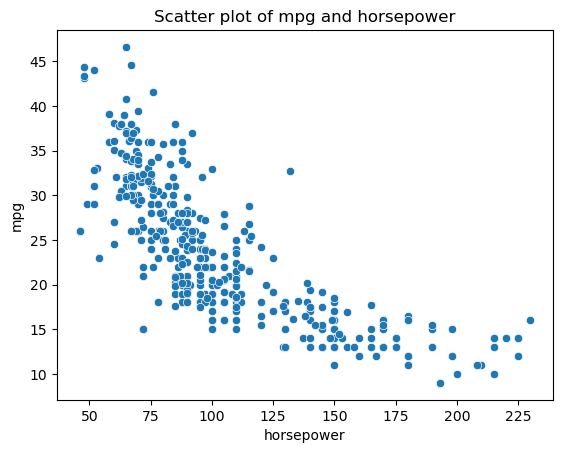

In [13]:
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter plot of mpg and horsepower')


In [6]:
import numpy as np
# Remove rows with NaNs or infinite values in 'mpg' or 'horsepower'
df_clean = df[np.isfinite(df['mpg']) & np.isfinite(df['horsepower'])]

# Calculate Pearson correlation
pearson_corr, p_value = pearsonr(df_clean['mpg'], df_clean['horsepower'])
pearson_corr, p_value

(-0.7784267838977759, 7.031989029405036e-81)

- La corrélation de pearson est de 78% 
- la p-value est extrêment petite, ce qui veut dire que ces varibales sont bel et bien corrélées parce que HO ici préssupose qu'elles ne sont pas corrélées. Donc la probabilité pour observer une telle corrélation si les deux variables étaient décorrélées est extrêmement faible

2. Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?




In [14]:
df_filtered_1 = df[(df['origin'].isin(['usa', 'japan', 'europe'])) & (df['model_year'] >= 70) & (df['model_year'] <= 74)]
df_filtered_2 = df[(df['origin'].isin(['usa', 'japan', 'europe'])) & (df['model_year'] >= 75) & (df['model_year'] <= 79)]

df_filtered_1_mean = df_filtered_1['mpg'].mean()
df_filtered_2_mean = df_filtered_2['mpg'].mean()

# Perform t-test
t_stat, p_value = ttest_ind(df_filtered_1['mpg'], df_filtered_2['mpg'], equal_var=True)
t_stat, p_value




(-5.124844610385172, 5.295104451324324e-07)

- La probabilité pour qu'on observe une telle différence de moyenne si les deux moyennes étaient les mêmes est trop petite, on peut donc affirmer avec un risque d'erreur de moins de 2% que ça a augmenté oui. 

3. Un constructeur automobile américain affirme que les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [8]:
df_4_cylinders = df.query('cylinders == 4 and origin == "usa"')
df_6_cylinders = df.query('cylinders == 6 and origin == "usa"')

print(df_4_cylinders['acceleration'].mean())
print(df_6_cylinders['acceleration'].mean())

# Perform t-test
t_stat, p_value = ttest_ind(df_4_cylinders['acceleration'], df_6_cylinders['acceleration'])
t_stat, p_value


16.465217391304343
16.467123287671235


(-0.0055490223717790345, 0.9955804426559065)

- Donc, nous n'avons pas suffisemment de preuve pour rejeter H0. Nous avons même bcp de preuve de le confirmer. 

4. Un collectionneur de voitures vous affirme que parmi les voitures Ford des années 1970-1982, il y avait :

- 25 % de 4 cylindres

- 25 % de 6 cylindres

- 50 % de 8 cylindres

Testez son affirmation et concluez avec un niveau de confiance de 95 %.

48
16
12
20
On ne peut pas rejeter l'hypothèse nulle. Les proportions observées sont conformes aux proportions théoriques.


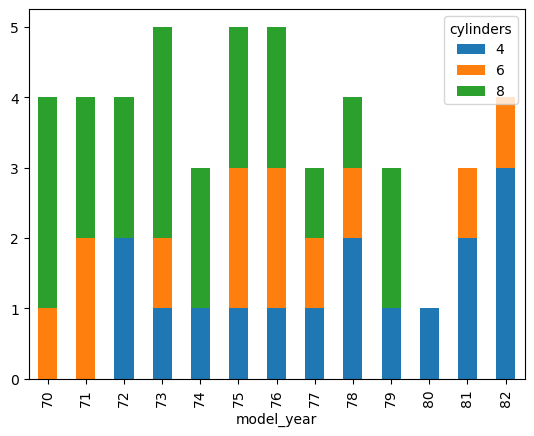

In [9]:
result = df[df['name'].str.contains('ford', case=False, na=False)]
result = result.query("model_year >= 70 and model_year <= 82")
four_cylinders = result.query('cylinders == 4')
six_cylinders = result.query('cylinders == 6')
eight_cylinders = result.query('cylinders == 8')

print(result['acceleration'].count())
print(four_cylinders['acceleration'].count())
print(six_cylinders['acceleration'].count())
print(eight_cylinders['acceleration'].count())


test = pd.crosstab(result['model_year'], result['cylinders'])
test.plot(kind='bar', stacked=True)


import scipy.stats as stats

# Effectifs observés (exemple)
observed_counts = [four_cylinders['acceleration'].count(), six_cylinders['acceleration'].count(), eight_cylinders['acceleration'].count()]  # nombre de voitures pour 4, 6 et 8 cylindres, respectivement

# Effectifs attendus (selon les proportions théoriques)
total = sum(observed_counts)
expected_counts = [0.25 * total, 0.25 * total, 0.5 * total]

# Test du chi-carré d'ajustement
chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Niveau de confiance de 95 % (alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Rejet de l'hypothèse nulle. Les proportions observées diffèrent des proportions théoriques.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle. Les proportions observées sont conformes aux proportions théoriques.")



5. Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [10]:
import scipy.stats as stats

# Exemple de données : consommation d'essence pour les voitures à 4 cylindres dans chaque région (en L/100 km)
japan_mpg = df.query('cylinders == 4 and origin == "japan"')['mpg']
europe_mpg = df.query('cylinders == 4 and origin == "europe"')['mpg']
us_mpg = df.query('cylinders == 4 and origin == "usa"')['mpg']

# Application du test ANOVA
f_stat, p_value = stats.f_oneway(japan_mpg, europe_mpg, us_mpg)

# Niveau de confiance de 98 % (alpha = 0,02)
alpha = 0.02
if p_value < alpha:
    print("Rejet de l'hypothèse nulle. Les moyennes de consommation d'essence diffèrent entre au moins deux régions.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle. Les moyennes de consommation d'essence sont statistiquement similaires entre les trois régions.")


Rejet de l'hypothèse nulle. Les moyennes de consommation d'essence diffèrent entre au moins deux régions.



6. Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [11]:
import scipy.stats as stats

# Exemple de données : nombre de chevaux pour les voitures européennes et japonaises
europe_hp = df.query('origin == "europe"')['horsepower']  # Chevaux des voitures européennes
japan_hp = df.query('origin == "japan"')['horsepower']  # Chevaux des voitures japonaises

# Test t de Student pour échantillons indépendants
t_stat, p_value = stats.ttest_ind(europe_hp, japan_hp)  # Ajuster à False si variances différentes

# Niveau de confiance de 98 % (alpha = 0,02)
alpha = 0.02
if p_value < alpha:
    print("Rejet de l'hypothèse nulle. Les moyennes du nombre de chevaux diffèrent entre les voitures européennes et japonaises.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle. Les moyennes du nombre de chevaux sont statistiquement similaires entre les voitures européennes et japonaises.")


On ne peut pas rejeter l'hypothèse nulle. Les moyennes du nombre de chevaux sont statistiquement similaires entre les voitures européennes et japonaises.


7. Un spécialiste vous dit que les constructeurs Ford et Dodge produisaient dans les années 70-82 des voitures avec un nombre de cylindres équivalent. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).




In [12]:
# Filtrer le dataframe pour ne conserver que les marques Ford et Dodge
filtered_df = df[df['name'].str.contains('ford|dodge', case=False, na=False)]

# Créer une colonne "brand" pour indiquer la marque
filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x.lower() else 'dodge')

# Créer une table de contingence avec les effectifs pour chaque combinaison de marque et de nombre de cylindres
contingency_table = pd.crosstab(filtered_df['brand'], filtered_df['cylinders'])

# Appliquer le test du chi-carré d'indépendance
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Niveau de confiance de 98 % (alpha = 0.02)
alpha = 0.02
if p_value < alpha:
    print("Rejet de l'hypothèse nulle. La répartition des cylindres diffère significativement entre Ford et Dodge.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle. La répartition des cylindres est similaire entre Ford et Dodge.")

# Affichage de la table de contingence et des valeurs attendues
print("\nTable de contingence :")
print(contingency_table)
print("\nEffectifs attendus :")
print(expected)

On ne peut pas rejeter l'hypothèse nulle. La répartition des cylindres est similaire entre Ford et Dodge.

Table de contingence :
cylinders   4   6   8
brand                
dodge      12   4  12
ford       16  12  20

Effectifs attendus :
[[10.31578947  5.89473684 11.78947368]
 [17.68421053 10.10526316 20.21052632]]


C:\Users\Wolf\AppData\Local\Temp\ipykernel_22284\1900805938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x.lower() else 'dodge')
